# Credit Card Fraud

Our aim is to identify instances of credit card fraud using three distinct models that utilize various features of our dataset. The first model we will use is Logistic Regression. Our primary focus will be on minimizing the False Negative Rate (FNR). Given that the dataset is imbalanced, we can experiment with two techniques that could potentially improve our predictions. These techniques include adding Gaussian noise to the fraud data to generate more instances and balance the dataset, as well as randomly selecting fraud data and training k models, then selecting the best one or averaging them out.

In [22]:
#pip install pandas_ml

In [133]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import random

In [134]:
# May have to do this...
#!pip install imblearn
#!pip install --upgrade sklearn

In [135]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,120118.0,0.281168,-0.042035,0.844375,-0.295518,-0.800160,-0.150096,-0.220032,-0.762884,0.912945,...,0.949785,0.248345,0.028391,-0.097796,0.360151,0.607856,0.160880,0.269318,74.99,0
1,113734.0,-0.782440,-0.268370,-1.043639,-2.327442,2.329886,-0.933807,1.897387,-0.629684,-0.056217,...,0.071201,0.578986,0.149429,-0.059143,-0.327529,1.038591,-0.158081,-0.206925,69.50,0
2,153746.0,0.186948,-0.573283,1.757616,-1.467546,-1.238830,0.038974,-0.905049,0.308156,0.500668,...,0.200327,0.778389,-0.026206,-0.085188,-0.642940,-0.252938,0.132842,0.054507,1.00,0
3,75750.0,1.190746,1.265327,-1.477330,1.578233,0.805379,-1.620875,0.685694,-0.259457,-0.738327,...,-0.144035,-0.345468,-0.196964,0.213895,0.804254,-0.324708,0.037205,0.089090,0.89,0
4,130474.0,2.046109,-1.085099,0.001594,-0.563829,-1.250156,0.162741,-1.395875,0.070995,0.128813,...,-0.113204,0.178229,0.300299,0.501796,-0.636627,0.576474,0.016057,-0.016506,45.90,0


In [136]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


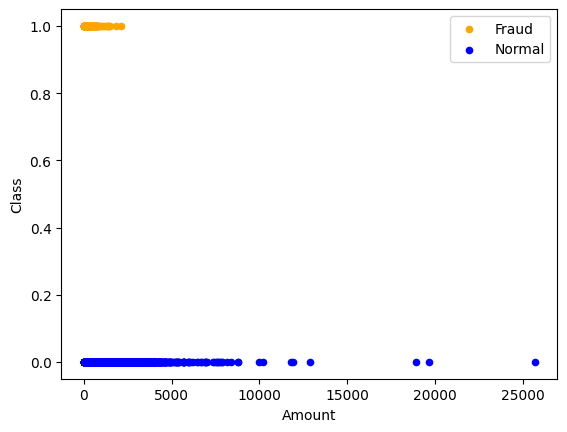

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [137]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

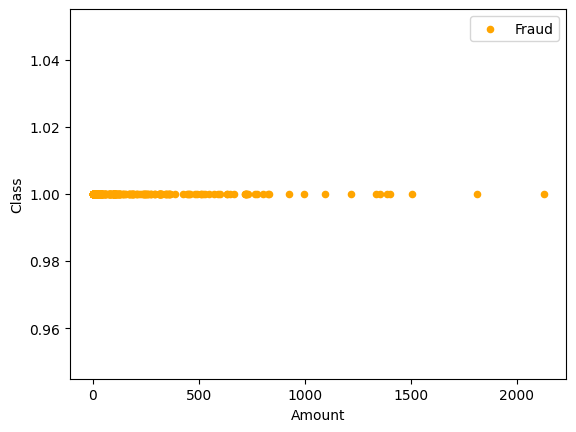

In [138]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

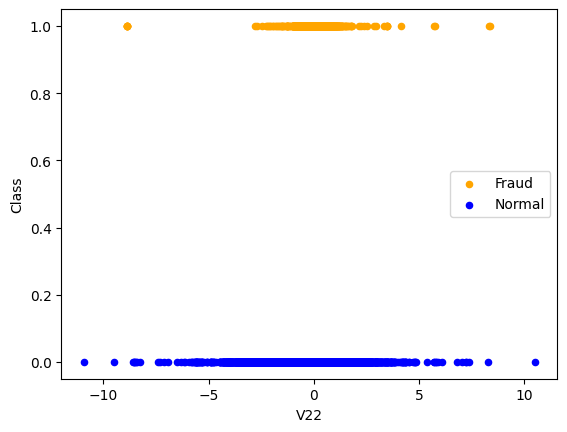

This feature may not be very important because of the similar distribution.


In [139]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [140]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [141]:
X=df.drop('Class',axis=1)
y=df['Class']

In [142]:
print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 158 0.001585024527752977
Number of frauds on y_train: 334 0.0018041961063935525


In [152]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
215023,152998.0,-0.071459,1.083948,-1.232472,-0.377323,1.612822,-0.966495,1.963140,-0.465379,-0.879616,...,0.104304,0.241080,0.755182,-0.079026,0.596697,-0.304161,0.341515,0.134367,0.245969,78.31
119843,52625.0,-1.547868,-0.021655,1.375548,0.214471,1.803694,-1.420937,0.460290,0.039927,-0.700288,...,0.046788,0.161475,0.058140,-0.211811,0.049730,0.800525,-0.350799,-0.023360,0.069226,0.99
143085,14010.0,1.265987,0.356182,0.168989,0.624742,0.042304,-0.322368,-0.166205,-0.058246,1.197617,...,-0.131450,-0.439161,-1.080071,0.051665,-0.475042,0.234293,0.083157,-0.058373,0.005802,0.99
193038,125936.0,2.046667,0.488648,-2.394695,0.794247,0.398876,-1.851140,0.281783,-0.332873,0.719033,...,-0.243627,0.081989,0.372364,-0.029673,-0.206379,0.209539,-0.098505,0.011001,0.004933,1.00
51555,71695.0,-0.538507,0.893381,-1.034437,-1.063501,2.053793,3.308629,-0.134319,1.149065,-0.541400,...,-0.132502,0.220666,0.326715,-0.096055,1.049867,-0.025495,0.392789,-0.352906,-0.060450,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173363,34167.0,1.143094,0.281941,-0.284038,1.015200,0.392211,-0.176591,0.388939,-0.032115,-0.534818,...,-0.118757,0.076647,0.178145,-0.192260,-0.296340,0.762446,-0.250510,-0.005955,-0.000579,36.06
5988,30498.0,1.178470,-0.123401,0.671043,0.499135,-0.745993,-0.475935,-0.251069,0.014891,0.444159,...,-0.100979,-0.030888,0.120465,-0.069275,0.612235,0.480081,0.641199,-0.037366,-0.000878,9.00
136374,121928.0,0.893954,-1.906423,-0.792754,1.761427,-1.194195,-0.361077,0.222741,-0.101136,0.972961,...,0.760344,0.191677,-0.655561,-0.088387,-0.099542,-0.655477,-0.983179,-0.052977,0.067699,550.00
55899,69045.0,-1.709712,1.868742,0.479484,-0.010392,-1.141206,-0.771137,-0.449962,1.258862,-0.997187,...,-0.261412,-0.004585,-0.435204,0.297987,0.515805,-0.699371,-0.110709,-0.268287,0.007026,16.50


In [157]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Store the column names of X_train
column_names = X_train.columns

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a new DataFrame with scaled data and original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=column_names)
# Access the column names
print(X_train_scaled.columns)


logistic.fit(X_train_scaled_df, y_train)
print("Score: ", logistic.score(X_test, y_test))

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Score:  0.9981240532487987


In [158]:
X_train_scaled.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [159]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
[[99495    30]
 [  157     1]]


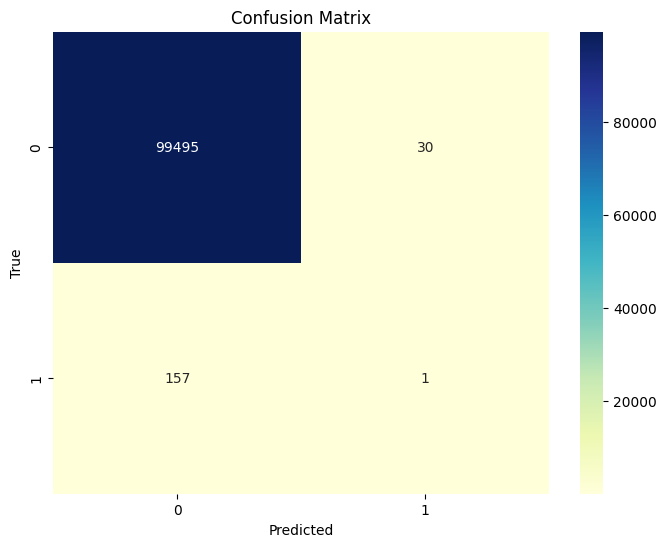

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.03      0.01      0.01       158

    accuracy                           1.00     99683
   macro avg       0.52      0.50      0.50     99683
weighted avg       1.00      1.00      1.00     99683



In [160]:
# Compute confusion matrix
cm = confusion_matrix(y_right, y_predicted)

# Print confusion matrix
print("Confusion matrix:\n%s" % cm)

# Plot confusion matrix with colored background
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")  # Change cmap to "YlGnBu"
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_right, y_predicted))

In [161]:
# Compute false negative rate (FNR)
tn, fp, fn, tp = cm.ravel()
fnr = fn / (fn + tp)
# Print FNR
print("FNR is {0}".format(fnr))

FNR is 0.9936708860759493


# Logistic Regression with SMOTE over-sampling

In [163]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.03      0.01      0.01       158

    accuracy                           1.00     99683
   macro avg       0.52      0.50      0.50     99683
weighted avg       1.00      1.00      1.00     99683



In [174]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Apply SMOTE over-sampling on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.68      0.81     56881
           1       0.00      0.64      0.01        81

    accuracy                           0.68     56962
   macro avg       0.50      0.66      0.41     56962
weighted avg       1.00      0.68      0.81     56962



C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
print("Size of training set after over-sampling:", len(X_train_res))

Size of training set after over-sampling: 454868


In [120]:
X_train_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41765.000000,-0.751685,0.243003,2.773854,-0.306515,-0.193949,-0.165658,0.190021,0.077722,0.222451,...,0.026847,0.266388,-0.148074,0.573033,-0.195258,0.098799,-0.090506,-0.113500,11.500000,0
1,169426.000000,1.963183,-0.504210,-0.172391,1.548823,-0.369061,0.976089,-1.128640,0.420583,0.195028,...,-0.104398,-0.419695,0.269053,-1.363673,-0.922719,2.119527,-0.159660,-0.079267,24.590000,0
2,110175.000000,1.933911,-0.200287,-1.283323,0.202389,0.830987,0.953121,-0.293644,0.223672,1.683204,...,-0.353474,-0.596913,0.349531,-1.707134,-0.501019,0.272959,-0.056388,-0.094365,4.490000,0
3,45082.000000,0.938952,-0.661382,0.785272,0.654337,-0.828441,0.373370,-0.572695,0.196188,0.906844,...,0.162087,0.352597,-0.195324,-0.368208,0.261164,0.621059,-0.006034,0.036959,138.000000,0
4,87006.000000,1.931561,-1.057130,-2.335387,-0.938635,-0.066463,-1.282714,0.389134,-0.509970,-1.213569,...,0.478023,0.976891,-0.265664,-0.265879,0.396201,0.062680,-0.115546,-0.065571,180.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369617,152070.904429,-4.660614,3.767380,-7.580274,6.490367,-1.136566,-2.000107,-3.548298,0.216009,-1.536464,...,0.781393,0.548263,0.397312,-0.317976,-0.276449,0.321621,-2.530931,0.629573,13.199458,1
369618,148053.000000,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.590000,1
369619,140238.356878,0.692206,2.920956,-4.797440,4.656420,3.116552,-1.244126,0.906487,-1.768166,-2.013156,...,1.309208,-0.641589,0.347017,-1.166302,-1.250061,0.029404,0.138169,0.136899,1.769794,1
369620,8194.561515,0.742108,4.116731,-7.368567,7.319619,0.936263,-2.755239,-1.594187,0.537437,-2.457224,...,0.391846,0.073544,0.152713,-0.237672,-0.740455,0.444949,0.646660,0.192554,1.000000,1


In [177]:
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.322934587970928


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [180]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = confusion_matrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
#confusion_matrix1.plot(normalized=True)
#plt.show()
#confusion_matrix1.print_stats()

Confusion matrix:
[[18368 38513]
 [   54    27]]


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [181]:
#print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

# Logistic Regression with balanced class weights

In [187]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

best_c, best_fnr = 1, 1

for _ in range(20):
    c = random.uniform(1, 10000)

    logistic = LogisticRegression(C=c, class_weight="balanced", fit_intercept=False)
    logistic.fit(X_train, y_train)

    y_predicted = logistic.predict(X_test)
    confusion_matrix2 = confusion_matrix(y_test, y_predicted)
    fnr = confusion_matrix2[1, 0] / (confusion_matrix2[1, 0] + confusion_matrix2[1, 1])

    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c

print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but L

Best C is 9107.418591013386 with best FNR of 0.4074074074074074.


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We were successful in reducing the false negative rate, as we were able to decrease it from 157 to 54.